#Theory Questions

**1.What is unsupervised learning in the context of machine learning?**

->Unsupervised learning is a type of machine learning where the model is trained on data without labeled outputs. The algorithm tries to find hidden patterns, groupings, or structures in the data. Common tasks include clustering (grouping similar items) and dimensionality reduction.

**2.How does K-Means clustering algorithm work?**

->K-Means partitions data into k clusters. It works by:
1. Randomly initializing k centroids.
2. Assigning each data point to the nearest centroid.
3. Updating centroids by computing the mean of points in each cluster.
4. Repeating assignment and update until convergence (no major centroid movement).

**3.Explain the concept of a dendrogram in hierarchical clustering.**

->A dendrogram is a tree-like diagram that shows how clusters are merged or split in hierarchical clustering. Each level of the tree represents a cluster merge, and the height at which merges occur indicates the distance or dissimilarity between clusters.

**4.What is the main difference between K-Means and Hierarchical Clustering?**

->K-Means: Requires predefining the number of clusters (k). It’s partition-based and iterative.

Hierarchical: Builds a hierarchy of clusters (either bottom-up or top-down) without requiring k in advance (though we can cut the dendrogram later).

**5.What are the advantages of DBSCAN over K-Means?**

->The advantages of DBSCAN over K-Means are:
1. Can find clusters of arbitrary shapes.
2. Does not require the number of clusters in advance.
3. Can detect noise/outliers.
4. Works better with clusters of varying sizes and densities

**6.When would you use Silhouette Score in clustering?**

->Silhouette Score is used to evaluate how well-defined clusters are. It measures how similar a point is to its own cluster compared to other clusters. It’s useful when comparing different clustering results to determine the best k or parameters.

**7.What are the limitations of Hierarchical Clustering?**

->The limitations of Hierarchical Clustering are:
1. Computationally expensive for large datasets.
2. Once merged/split, decisions cannot be undone.
3. Sensitive to noise and outliers.
4. Choice of linkage method heavily influences results.

**8.Why is feature scaling important in clustering algorithms like K-Means?**

->Because K-Means relies on distance calculations (usually Euclidean), features with larger ranges dominate. Scaling ensures all features contribute equally, preventing bias toward high-magnitude variables.

**9.How does DBSCAN identify noise points?**

->DBSCAN identify noise points that cannot be assigned to any cluster (i.e., not within the neighborhood of enough points to meet minPts) are labeled as noise (or outliers).

**10.Define inertia in the context of K-Means.**

->Inertia is the sum of squared distances of samples to their nearest cluster centroid. It measures cluster compactness, with lower inertia indicating tighter clusters.

**11.What is the elbow method in K-Means clustering?**

->It’s a method to choose the optimal number of clusters.Plotting inertia against different values of k, the “elbow point” (where reduction in inertia slows) suggests the best k.

**12.Describe the concept of "density" in DBSCAN.**

->Density is defined as the number of points within a specified neighborhood (eps). A cluster is formed when there are enough points (minPts) within this neighborhood, indicating dense regions.

**13.Can hierarchical clustering be used on categorical data?**

->Yes, but distance metrics must be adapted. Instead of Euclidean distance, measures like Hamming distance or similarity-based approaches are used. However, hierarchical clustering works more naturally with numerical data.

**14.What does a negative Silhouette Score indicate?**

->It means the point is assigned to the wrong cluster since it is closer to a neighboring cluster than to its own cluster.

**15.Explain the term "linkage criteria" in hierarchical clustering.**

->Linkage criteria define how distances between clusters are computed when merging:
1. Single linkage → nearest points.
2. Complete linkage → farthest points.
3. Average linkage → average distance of all pairs.
4. Ward’s method → minimizes within-cluster variance.

**16.Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?**

->Because it assumes clusters are spherical, equally sized, and similar in density. When this assumption breaks, K-Means may merge sparse clusters or split dense ones incorrectly.

**17.What are the core parameters in DBSCAN, and how do they influence clustering?**

->
1. eps (ε) → radius of the neighborhood. Small eps → more, smaller clusters;
large eps → fewer, larger clusters.

2. minPts → minimum points required to form a dense region.Higher values → stricter clusters; lower values → looser clusters.

**18.How does K-Means++ improve upon standard K-Means initialization?**

->It selects initial centroids more intelligently by spreading them apart. Each new centroid is chosen with probability proportional to its squared distance from existing centroids. This avoids poor clustering and speeds up convergence.

**19.What is agglomerative clustering?**

->It is a bottom-up hierarchical clustering method. Each data point starts as its own cluster, and pairs of clusters are merged step by step based on the chosen linkage criterion until all points are in one cluster.

**20.What makes Silhouette Score a better metric than just inertia for model evaluation?**

->
* Inertia: only measures compactness within clusters.
* Silhouette Score: considers both compactness (cohesion) and separation (distance from other clusters).

This makes Silhouette more reliable, especially when comparing clustering quality across different datasets or algorithms.

#Practical Questions

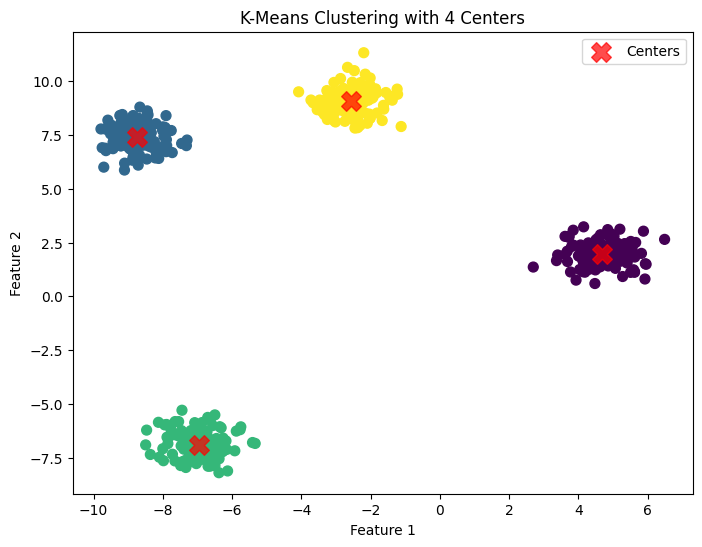

In [1]:
"""
21.Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
scatter plot.
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data with 4 centers
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 3. Visualize clusters with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label="Centers")

plt.title("K-Means Clustering with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [2]:
"""
22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
predicted labels.

"""

# Import required libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# 1. Load Iris dataset
iris = load_iris()
X = iris.data

# 2. Apply Agglomerative Clustering (3 clusters)
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

# 3. Display first 10 predicted labels
print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


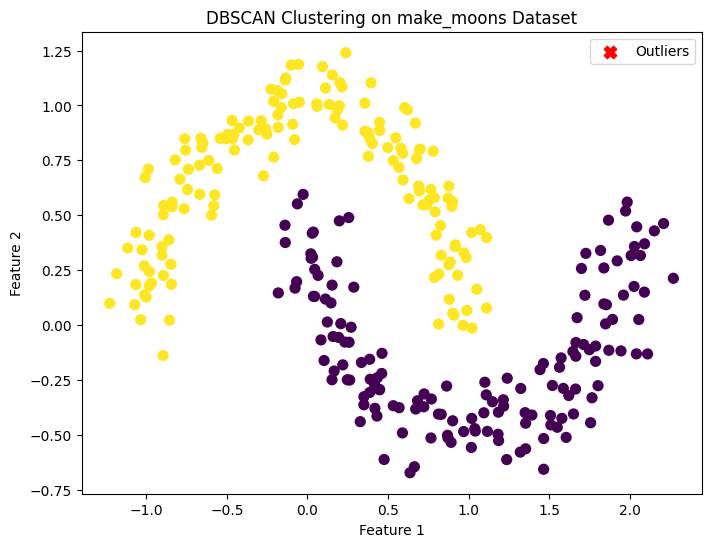

In [3]:
"""
23.Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

"""
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 1. Generate synthetic data (two interleaving half circles)
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# 2. Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)  # eps = neighborhood radius, min_samples = minimum points
labels = dbscan.fit_predict(X)

# 3. Identify outliers (label = -1 means outlier in DBSCAN)
outliers = labels == -1

# 4. Plot results
plt.figure(figsize=(8,6))
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers], cmap='viridis', s=50)
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=80, marker='X', label='Outliers')

plt.title("DBSCAN Clustering on make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [4]:
"""
24.Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster.

"""
# Import required libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 1. Load Wine dataset
wine = load_wine()
X = wine.data

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-Means clustering (let's assume 3 clusters since Wine dataset has 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 4. Print the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster sizes:", cluster_sizes)


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


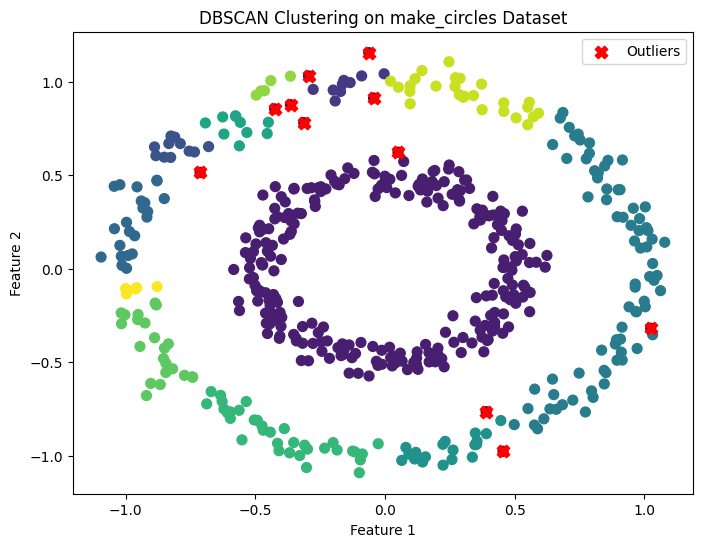

In [1]:
"""
25.Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.
"""
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# 1. Generate synthetic circular data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# 2. Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)  # eps = neighborhood radius
labels = dbscan.fit_predict(X)

# 3. Plot results
plt.figure(figsize=(8,6))

# Plot clustered points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

# Highlight outliers (label = -1)
outliers = labels == -1
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=80, marker='X', label='Outliers')

plt.title("DBSCAN Clustering on make_circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [2]:
"""
26.Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
centroids.
"""

# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 1. Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# 2. Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# 4. Output the cluster centroids
print("Cluster centroids (scaled feature space):\n")
print(kmeans.cluster_centers_)


Cluster centroids (scaled feature space):

[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


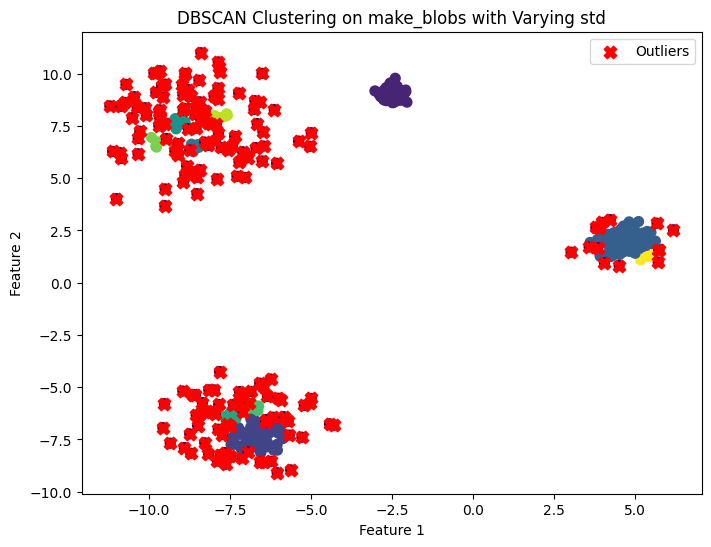

In [3]:
"""
27.Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN
"""
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# 1. Generate synthetic data with varying cluster standard deviations
X, y = make_blobs(n_samples=500,
                  centers=4,
                  cluster_std=[0.2, 0.5, 1.0, 1.5],
                  random_state=42)

# 2. Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps controls neighborhood radius
labels = dbscan.fit_predict(X)

# 3. Plot results
plt.figure(figsize=(8,6))

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

# Highlight outliers (label = -1)
outliers = labels == -1
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=80, marker='X', label='Outliers')

plt.title("DBSCAN Clustering on make_blobs with Varying std")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


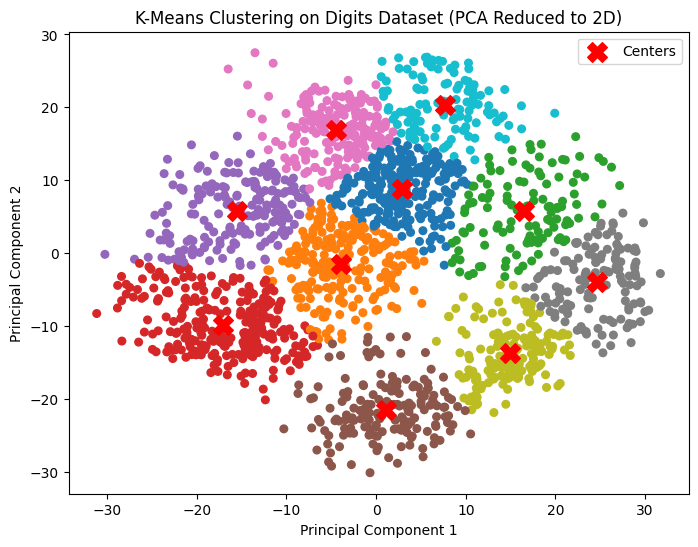

In [4]:
"""
28.Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load Digits dataset
digits = load_digits()
X = digits.data

# 2. Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Apply K-Means clustering (let's assume 10 clusters for digits 0-9)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 4. Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Centers")

plt.title("K-Means Clustering on Digits Dataset (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


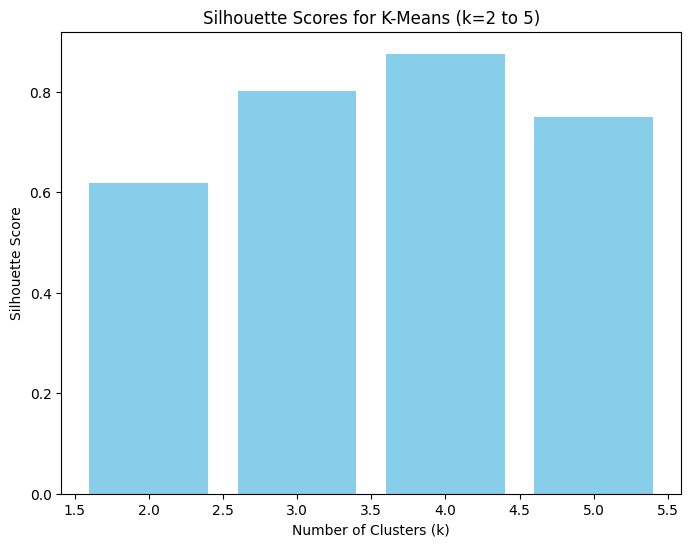

In [5]:
"""
29.Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.
"""
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Generate synthetic data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# 2. Evaluate silhouette scores for k = 2 to 5
silhouette_scores = []
k_values = [2, 3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# 3. Plot silhouette scores as bar chart
plt.figure(figsize=(8,6))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for K-Means (k=2 to 5)")
plt.show()


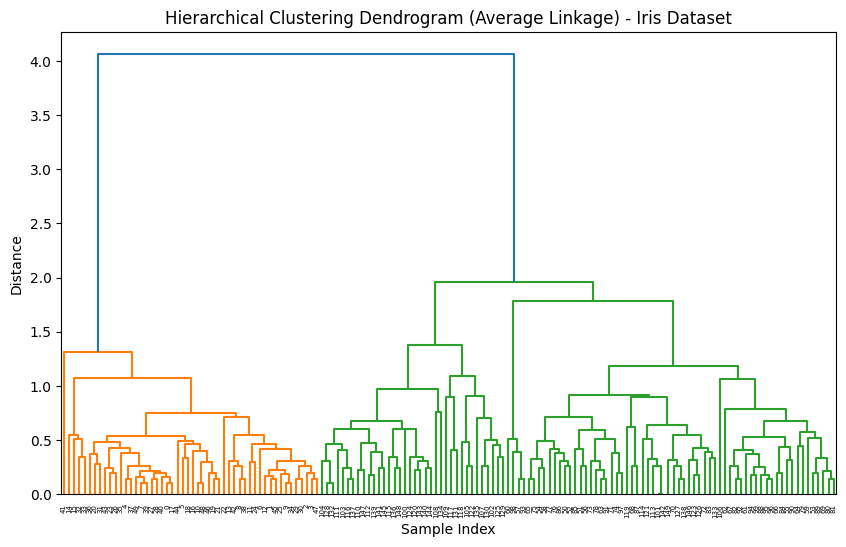

In [6]:
"""
30.Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.
"""
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Load Iris dataset
iris = load_iris()
X = iris.data

# 2. Perform hierarchical clustering with average linkage
linked = linkage(X, method='average')

# 3. Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)

plt.title("Hierarchical Clustering Dendrogram (Average Linkage) - Iris Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


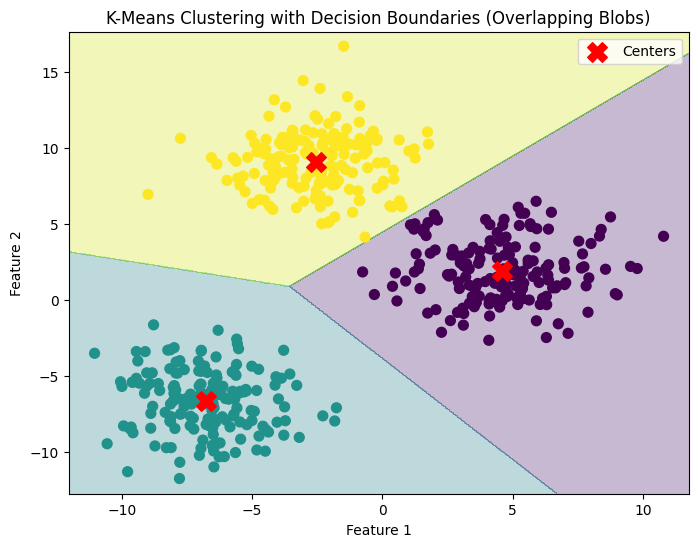

In [7]:
"""
31.Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundaries.
"""

# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 3. Create meshgrid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict cluster for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. Plot decision boundaries
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Centers")

plt.title("K-Means Clustering with Decision Boundaries (Overlapping Blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


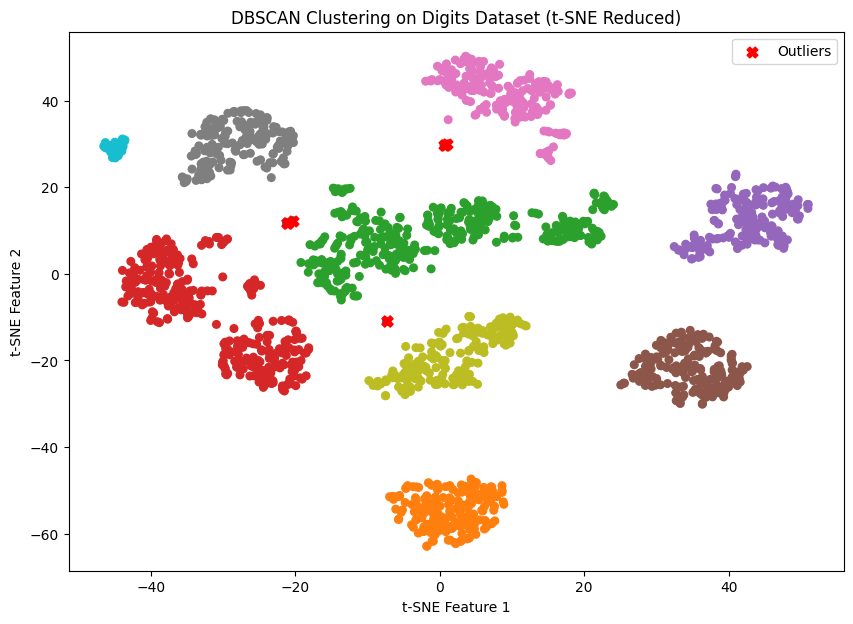

In [9]:
"""
32.Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')
# 1. Load Digits dataset
digits = load_digits()
X = digits.data

# 2. Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# 3. Apply DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=5)  # eps may need tuning
labels = dbscan.fit_predict(X_tsne)

# 4. Plot results
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="tab10", s=30)

# Highlight outliers (label = -1)
outliers = labels == -1
plt.scatter(X_tsne[outliers, 0], X_tsne[outliers, 1], c="red", s=60, marker="X", label="Outliers")

plt.title("DBSCAN Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.legend()
plt.show()


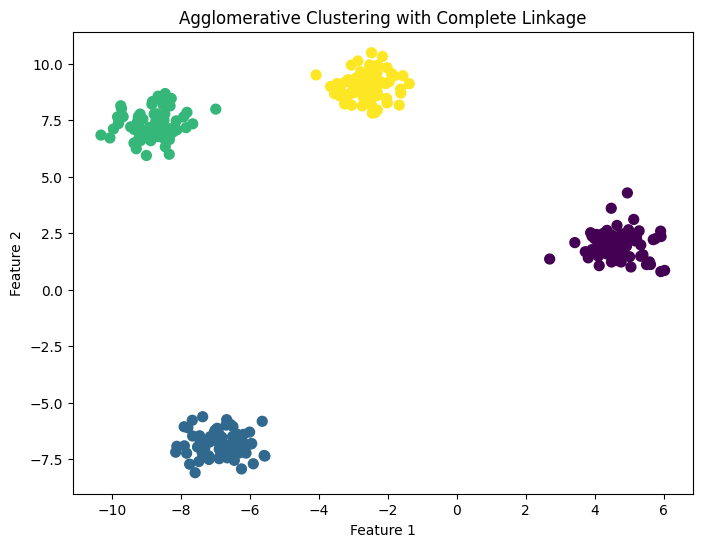

In [10]:
"""
33.Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# 1. Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# 2. Apply Agglomerative Clustering with complete linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

# 3. Plot results
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


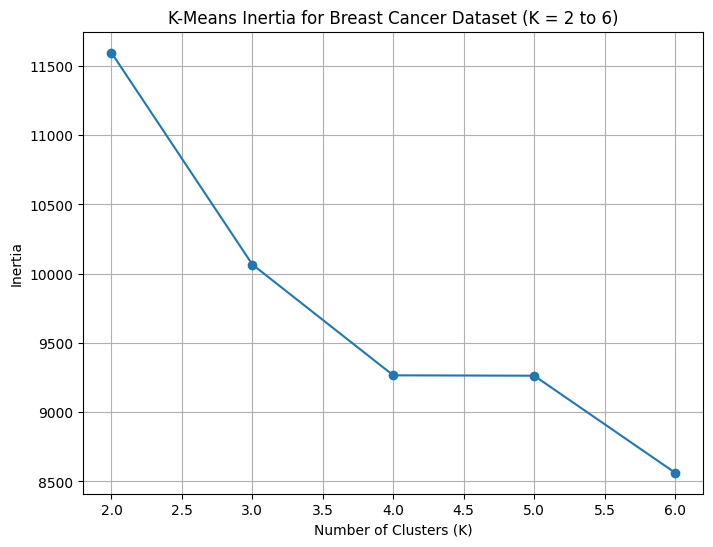

In [12]:
"""
34.Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Compute inertia values for K = 2 to 6
k_values = range(2, 7)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot inertia values
plt.figure(figsize=(8,6))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("K-Means Inertia for Breast Cancer Dataset (K = 2 to 6)")
plt.grid(True)
plt.show()


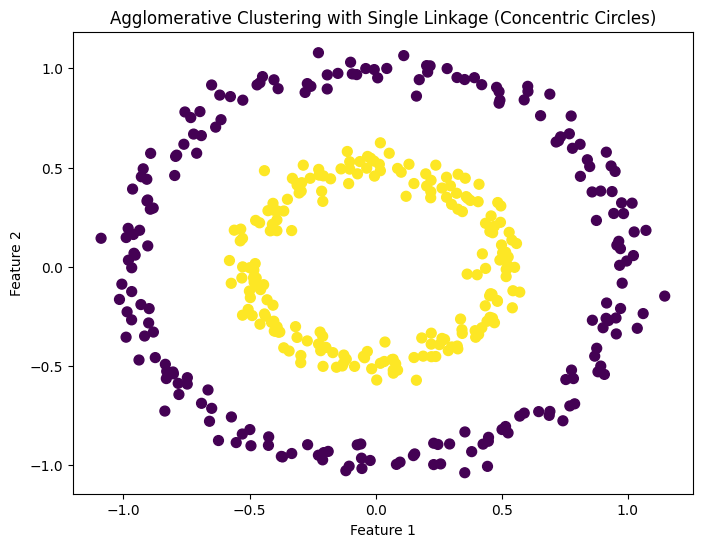

In [13]:
"""
35.Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# 1. Generate synthetic concentric circles
X, y_true = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

# 2. Apply Agglomerative Clustering with single linkage
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

# 3. Plot results
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

plt.title("Agglomerative Clustering with Single Linkage (Concentric Circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [14]:
"""
36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise6
"""
# Import required libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load Wine dataset
wine = load_wine()
X = wine.data

# 2. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # eps may need tuning
labels = dbscan.fit_predict(X_scaled)

# 4. Count number of clusters (excluding noise = -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


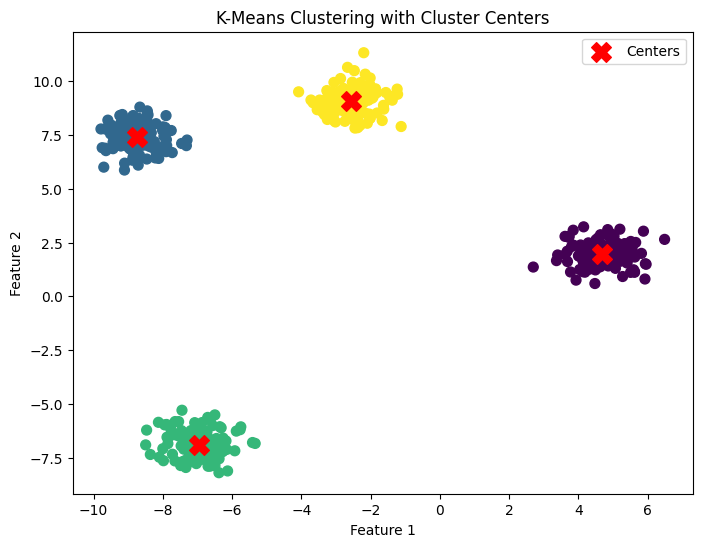

In [15]:
"""
37.Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points
"""
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# 3. Plot data points with cluster assignments
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

# 4. Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Centers")

plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [16]:
"""
38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.
"""
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load Iris dataset
iris = load_iris()
X = iris.data

# 2. Scale features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)  # eps may need tuning
labels = dbscan.fit_predict(X_scaled)

# 4. Count noise samples (label = -1)
n_noise = np.sum(labels == -1)

print("Number of noise samples identified by DBSCAN:", n_noise)


Number of noise samples identified by DBSCAN: 4


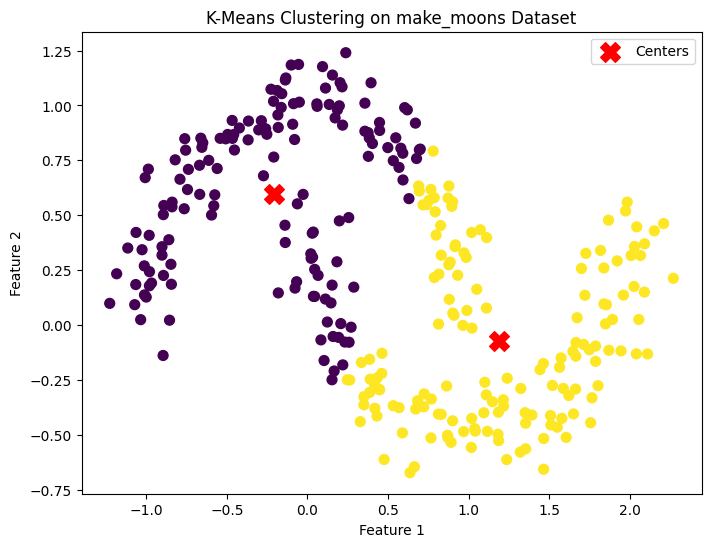

In [18]:
"""
39.Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# 1. Generate synthetic non-linear data (two interleaving moons)
X, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)

# 2. Apply K-Means clustering (try 2 clusters since moons have 2 classes)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# 3. Plot clustering result
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Centers")

plt.title("K-Means Clustering on make_moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


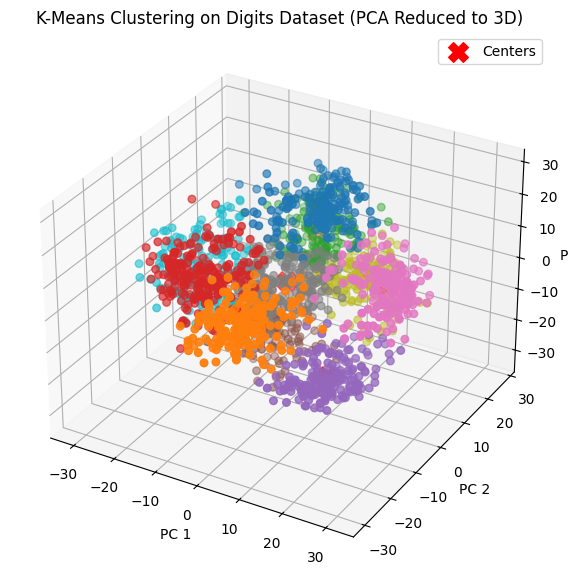

In [19]:
"""
40.Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot
"""

# Import required libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load Digits dataset
digits = load_digits()
X = digits.data

# 2. Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3. Apply K-Means clustering (10 clusters for digits 0-9)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 4. Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='tab10', s=30)

# Plot cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
           c='red', s=200, marker='X', label="Centers")

ax.set_title("K-Means Clustering on Digits Dataset (PCA Reduced to 3D)")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.legend()
plt.show()


In [20]:
"""
41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering
"""

# Import required libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Generate synthetic data with 5 centers
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# 3. Evaluate clustering using silhouette score
score = silhouette_score(X, labels)

print("Silhouette Score for KMeans with 5 clusters:", score)


Silhouette Score for KMeans with 5 clusters: 0.7993257411585863


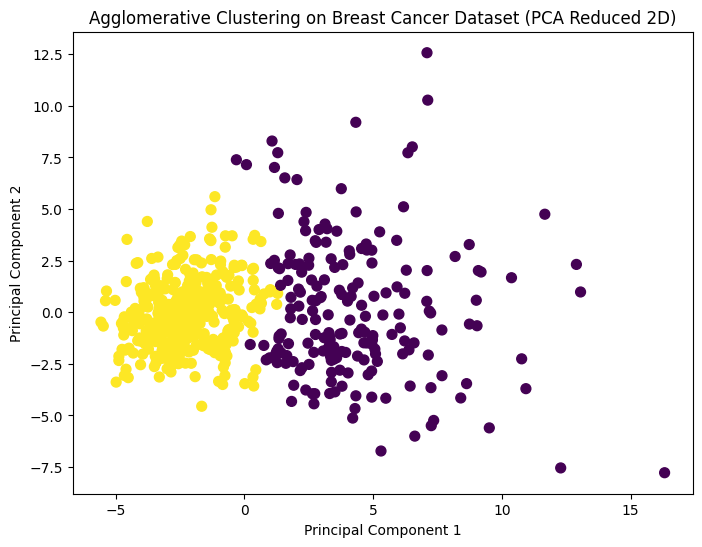

In [21]:
"""
42.Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
Visualize in 2D
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agg.fit_predict(X_pca)

# 5. Visualize results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Breast Cancer Dataset (PCA Reduced 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


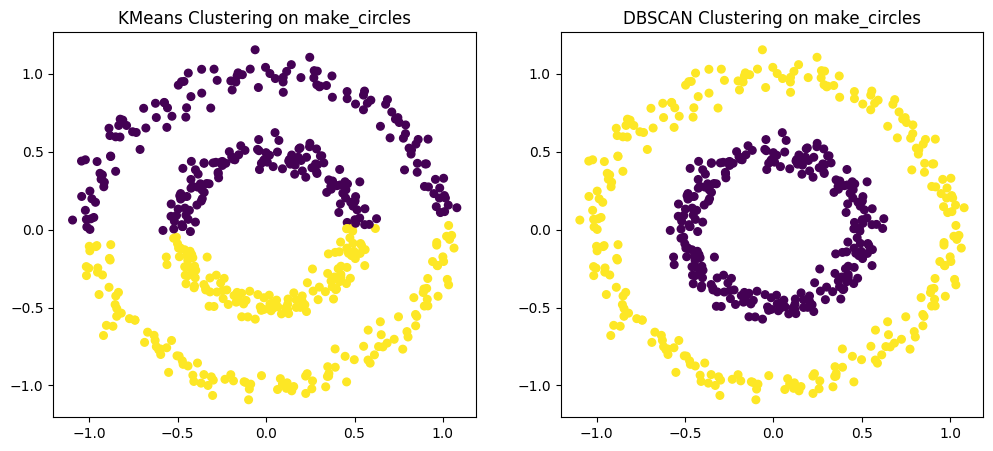

In [22]:
"""
43.Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

# 1. Generate noisy circular data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# 3. Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# 4. Plot results side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KMeans Plot
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=30)
axes[0].set_title("KMeans Clustering on make_circles")

# DBSCAN Plot
axes[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=30)
axes[1].set_title("DBSCAN Clustering on make_circles")

plt.show()


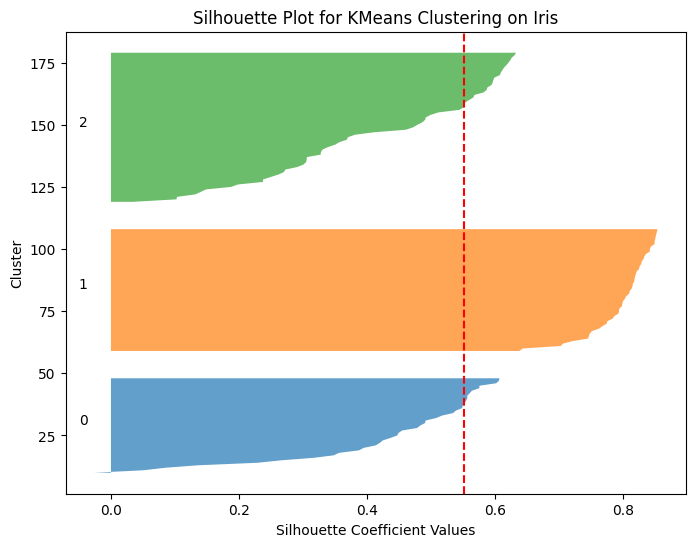

In [23]:
"""
44.Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# 1. Load Iris dataset
data = load_iris()
X = data.data

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# 3. Compute silhouette values
silhouette_vals = silhouette_samples(X, labels)
avg_silhouette = silhouette_score(X, labels)

# 4. Plot silhouette scores for each sample
y_lower = 10
plt.figure(figsize=(8, 6))

for i in range(3):  # for each cluster
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10  # gap between clusters

plt.axvline(x=avg_silhouette, color="red", linestyle="--")
plt.title("Silhouette Plot for KMeans Clustering on Iris")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")
plt.show()


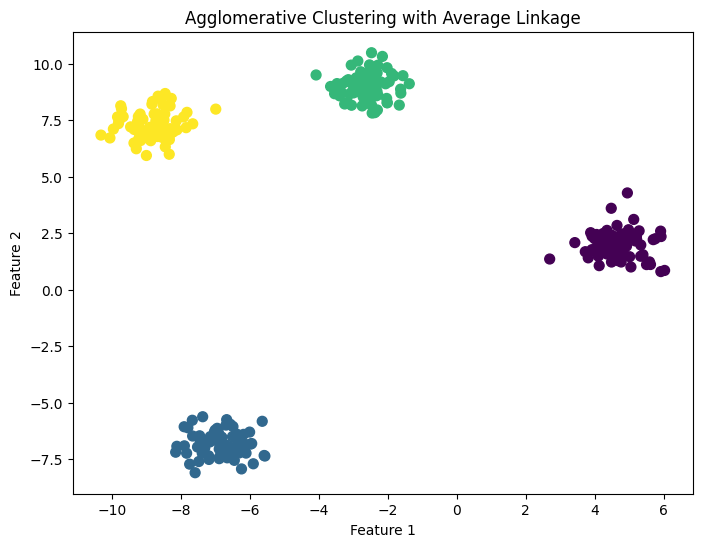

In [24]:
"""
45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters.
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# 1. Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# 2. Apply Agglomerative Clustering with average linkage
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

# 3. Plot results
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering with Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


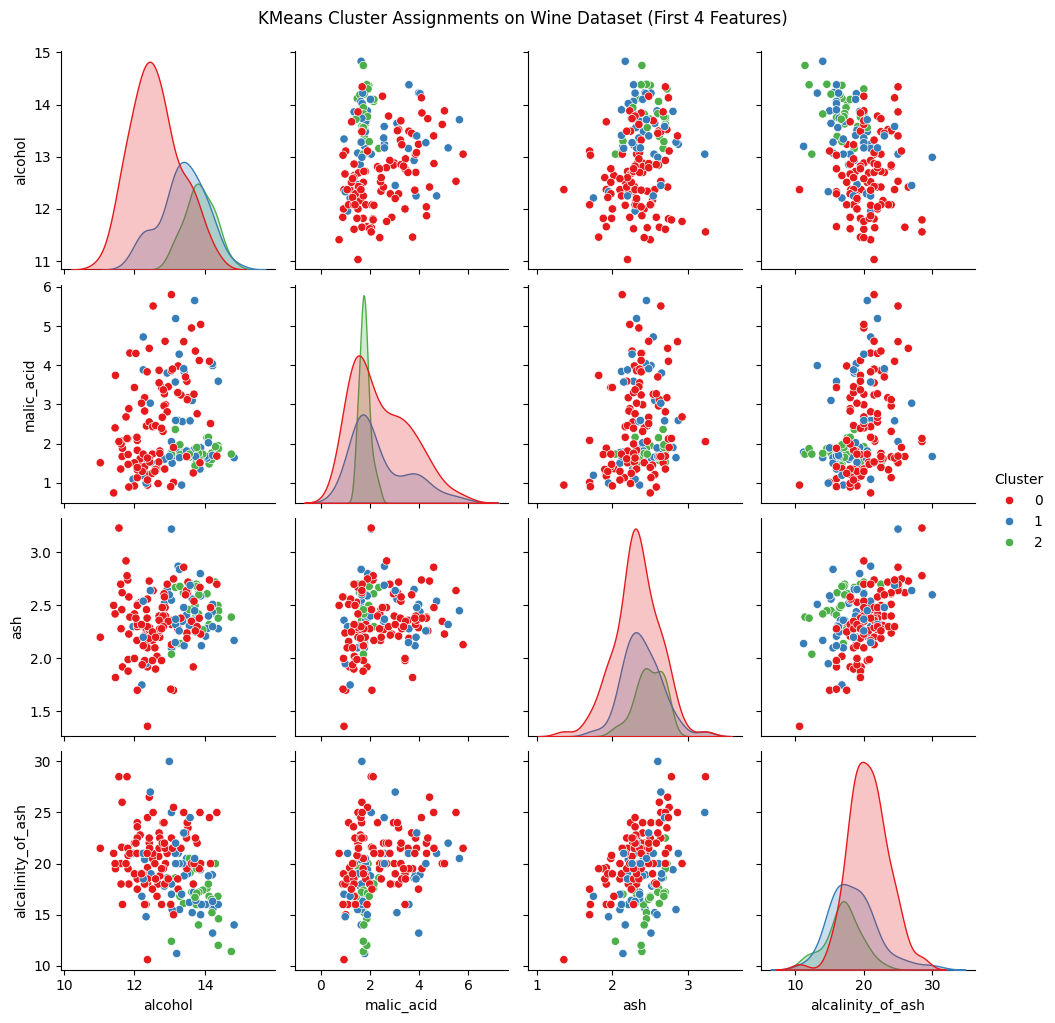

In [25]:
"""
46.Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features)
"""

# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

# 1. Load Wine dataset
wine = load_wine()
X = wine.data
feature_names = wine.feature_names

# 2. Create a DataFrame with first 4 features
df = pd.DataFrame(X[:, :4], columns=feature_names[:4])

# 3. Apply KMeans clustering (3 clusters, as Wine has 3 classes)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# 4. Plot pairplot with cluster assignments
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.suptitle("KMeans Cluster Assignments on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


In [26]:
"""
47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count
"""

# Import required libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate noisy blobs
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=[0.5, 1.0, 1.5], random_state=42)

# 2. Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# 3. Count clustered points and noise points
n_noise = np.sum(labels == -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clustered_points = len(labels) - n_noise

print(f"Number of clusters found: {n_clusters}")
print(f"Number of clustered points: {n_clustered_points}")
print(f"Number of noise points: {n_noise}")


Number of clusters found: 4
Number of clustered points: 434
Number of noise points: 66


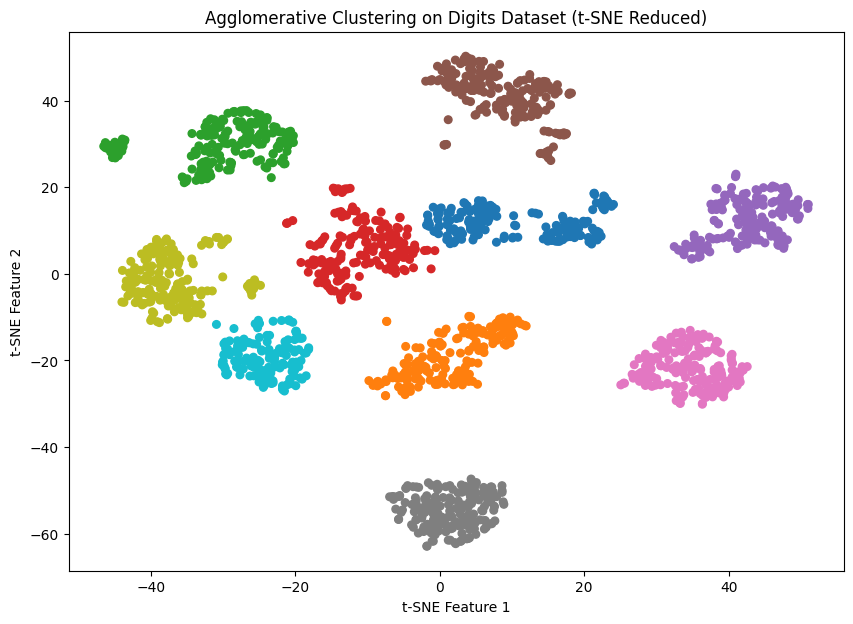

In [27]:
"""
48.Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters.
"""

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# 1. Load Digits dataset
digits = load_digits()
X = digits.data

# 2. Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# 3. Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agg.fit_predict(X_tsne)

# 4. Plot clusters
plt.figure(figsize=(10,7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=30)
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.show()
